In [140]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.neural_network import MLPRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn import linear_model
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.naive_bayes import GaussianNB

In [141]:
#chargement du fichier nettoyé
data = pd.read_csv("build_data_to_model1.csv")
data.head()

,DataYear,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEUIWN(kBtu/sf),...,SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kBtu),NaturalGas(kBtu),TotalGHGEmissions,GHGEmissionsIntensity,BuildingType,PrimaryPropertyType,Neighborhood,ZipCode
0,2015.0,1989.0,1.0,4.0,111077.0,0.0,111077.0,NaN,91.0,62.1,...,10155788.0,0.0,9899135.0,0.0,69.01,0.24,NonResidential,Retail Store,DOWNTOWN,18081.0
1,2015.0,1906.0,1.0,6.0,98370.0,25920.0,72450.0,98370.0,45.0,66.5,...,6541579.0,0.0,6488262.0,37893.0,47.24,0.20,NonResidential,Small- and Mid-Sized Office,DOWNTOWN,18081.0
2,2015.0,1947.0,1.0,4.0,193788.0,37854.0,155934.0,138672.0,59.0,104.0,...,16463978.0,0.0,16760914.0,0.0,116.84,0.23,NonResidential,Large Office,LAKE UNION,18390.0
3,2015.0,2008.0,1.0,3.0,76598.0,21410.0,55188.0,55188.0,76.0,83.7,...,4617864.0,0.0,2234200.0,2242889.0,134.69,1.63,NonResidential,Small- and Mid-Sized Office,GREATER DUWAMISH,18388.0
4,2015.0,1981.0,1.0,4.0,186971.0,0.0,186971.0,186977.0,86.0,72.6,...,13575377.0,0.0,9657951.0,3004906.0,226.92,0.99,NonResidential,Large Office,LAKE UNION,18390.0


In [142]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1697 entries, 0 to 1696
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   DataYear                   1697 non-null   float64
 1   YearBuilt                  1697 non-null   float64
 2   NumberofBuildings          1697 non-null   float64
 3   NumberofFloors             1697 non-null   float64
 4   PropertyGFATotal           1697 non-null   float64
 5   PropertyGFAParking         1697 non-null   float64
 6   PropertyGFABuilding(s)     1697 non-null   float64
 7   LargestPropertyUseTypeGFA  1685 non-null   float64
 8   ENERGYSTARScore            1154 non-null   float64
 9   SiteEUIWN(kBtu/sf)         1697 non-null   float64
 10  SourceEUIWN(kBtu/sf)       1697 non-null   float64
 11  SiteEnergyUseWN(kBtu)      1697 non-null   float64
 12  SteamUse(kBtu)             1697 non-null   float64
 13  Electricity(kBtu)          1697 non-null   float

In [143]:
data.describe()

,DataYear,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEUIWN(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kBtu),NaturalGas(kBtu),TotalGHGEmissions,GHGEmissionsIntensity,ZipCode
count,1697.000000,1697.000000,1697.000000,1697.000000,1.697000e+03,1697.000000,1.697000e+03,1.685000e+03,1154.000000,1697.000000,1697.000000,1.697000e+03,1.697000e+03,1.697000e+03,1.697000e+03,1697.000000,1697.000000,1564.000000
mean,2015.982911,1961.710077,1.148792,4.103712,1.183821e+05,13429.637596,1.049525e+05,9.886330e+04,64.951906,75.219210,179.240719,8.121502e+06,5.133132e+05,5.865634e+06,1.971806e+06,185.235053,1.501859,96643.709079
std,0.129641,32.859346,2.810985,6.518106,2.952745e+05,42950.127462,2.807659e+05,2.758224e+05,28.041709,74.930650,183.519181,2.204160e+07,5.351773e+06,2.069226e+07,9.400898e+06,745.538021,2.266608,10720.867756
min,2015.000000,1900.000000,0.500000,0.000000,1.128500e+04,-1.000000,-8.451000e+03,6.455000e+03,1.000000,0.000000,-2.050000,0.000000e+00,0.000000e+00,7.000000e+00,0.000000e+00,0.120000,0.000000,17919.000000
25%,2016.000000,1930.000000,1.000000,1.000000,2.939200e+04,0.000000,2.832000e+04,2.548000e+04,46.500000,35.600000,80.699999,1.334535e+06,0.000000e+00,7.328030e+05,0.000000e+00,20.150000,0.275000,98104.000000
50%,2016.000000,1965.000000,1.000000,2.000000,4.925200e+04,0.000000,4.736800e+04,4.347300e+04,72.500000,54.700001,135.100003,2.715609e+06,0.000000e+00,1.649172e+06,4.974050e+05,50.215000,0.785000,98109.000000
75%,2016.000000,1989.000000,1.000000,4.000000,1.067720e+05,0.000000,9.494800e+04,9.193500e+04,88.000000,86.400002,208.650002,7.302520e+06,0.000000e+00,4.871044e+06,1.507822e+06,139.630000,1.765000,98122.000000
max,2016.000000,2015.000000,111.000000,99.000000,9.320156e+06,512608.000000,9.320156e+06,9.320156e+06,100.000000,834.400024,2620.000000,4.716139e+08,1.314066e+08,6.570744e+08,2.979090e+08,16870.980000,34.090000,98199.000000


In [144]:
data.drop('ZipCode', axis=1, inplace = True)

In [145]:
#supprimer des variables qui puisse etre  une source de fuite de données
data = data.drop(['SteamUse(kBtu)','Electricity(kBtu)','SiteEUIWN(kBtu/sf)',
                         'SourceEUIWN(kBtu/sf)','GHGEmissionsIntensity','NaturalGas(kBtu)'], axis=1)

In [146]:
#identifier les valeurs numeriques et categoriques pour l'imputation des valeurs manquantes
num_data = data.select_dtypes(include=['int64','float64'])
cat_data = data.select_dtypes('object') 

In [147]:
cat_data

,BuildingType,PrimaryPropertyType,Neighborhood
0,NonResidential,Retail Store,DOWNTOWN
1,NonResidential,Small- and Mid-Sized Office,DOWNTOWN
2,NonResidential,Large Office,LAKE UNION
3,NonResidential,Small- and Mid-Sized Office,GREATER DUWAMISH
4,NonResidential,Large Office,LAKE UNION
...,...,...,...
1692,NaN,NaN,NaN
1693,Nonresidential COS,Other,DOWNTOWN
1694,Nonresidential COS,Other,MAGNOLIA / QUEEN ANNE
1695,Nonresidential COS,Mixed Use Property,GREATER DUWAMISH


In [148]:
cat_data.isnull().sum().any()

True

In [149]:
cat_data.isnull().sum().sum()

360

In [150]:
#pour les variables categoriques, je vais remplacer les valeurs manquantes par les valeurs qui se repetent le plus
cat_data=cat_data.apply(lambda x:x.fillna(x.value_counts().index[0]))

In [151]:
cat_data.isnull().sum().any()

False

In [152]:
cat_data.nunique()

BuildingType            5
PrimaryPropertyType    22
Neighborhood           14
dtype: int64

In [153]:
list(num_data.columns)

['DataYear',
 'YearBuilt',
 'NumberofBuildings',
 'NumberofFloors',
 'PropertyGFATotal',
 'PropertyGFAParking',
 'PropertyGFABuilding(s)',
 'LargestPropertyUseTypeGFA',
 'ENERGYSTARScore',
 'SiteEnergyUseWN(kBtu)',
 'TotalGHGEmissions']

In [154]:
num_data.isnull().sum().any()

True

In [155]:
num_data.isnull().sum().sum()

555

In [156]:
#pour les variables numeriques, je vais remplacer les valeurs manquantes par la median
num_data=num_data.fillna(num_data.median())

In [157]:
Energystar_Score = num_data['ENERGYSTARScore']
num_data = num_data.drop(['ENERGYSTARScore','DataYear'], axis=1)

In [158]:
data = pd.concat([cat_data, num_data], axis=1)

In [159]:
data.head()

,BuildingType,PrimaryPropertyType,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseTypeGFA,SiteEnergyUseWN(kBtu),TotalGHGEmissions
0,NonResidential,Retail Store,DOWNTOWN,1989.0,1.0,4.0,111077.0,0.0,111077.0,43473.0,10155788.0,69.01
1,NonResidential,Small- and Mid-Sized Office,DOWNTOWN,1906.0,1.0,6.0,98370.0,25920.0,72450.0,98370.0,6541579.0,47.24
2,NonResidential,Large Office,LAKE UNION,1947.0,1.0,4.0,193788.0,37854.0,155934.0,138672.0,16463978.0,116.84
3,NonResidential,Small- and Mid-Sized Office,GREATER DUWAMISH,2008.0,1.0,3.0,76598.0,21410.0,55188.0,55188.0,4617864.0,134.69
4,NonResidential,Large Office,LAKE UNION,1981.0,1.0,4.0,186971.0,0.0,186971.0,186977.0,13575377.0,226.92


In [160]:
data.isnull().sum().any()

False

In [161]:
data

,BuildingType,PrimaryPropertyType,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseTypeGFA,SiteEnergyUseWN(kBtu),TotalGHGEmissions
0,NonResidential,Retail Store,DOWNTOWN,1989.0,1.0,4.0,111077.0,0.0,111077.0,43473.0,1.015579e+07,69.01
1,NonResidential,Small- and Mid-Sized Office,DOWNTOWN,1906.0,1.0,6.0,98370.0,25920.0,72450.0,98370.0,6.541579e+06,47.24
2,NonResidential,Large Office,LAKE UNION,1947.0,1.0,4.0,193788.0,37854.0,155934.0,138672.0,1.646398e+07,116.84
3,NonResidential,Small- and Mid-Sized Office,GREATER DUWAMISH,2008.0,1.0,3.0,76598.0,21410.0,55188.0,55188.0,4.617864e+06,134.69
4,NonResidential,Large Office,LAKE UNION,1981.0,1.0,4.0,186971.0,0.0,186971.0,186977.0,1.357538e+07,226.92
...,...,...,...,...,...,...,...,...,...,...,...,...
1692,NonResidential,Small- and Mid-Sized Office,DOWNTOWN,1990.0,1.0,1.0,12294.0,0.0,12294.0,12294.0,9.430032e+05,20.94
1693,Nonresidential COS,Other,DOWNTOWN,2004.0,1.0,1.0,16000.0,0.0,16000.0,16000.0,1.053706e+06,32.17
1694,Nonresidential COS,Other,MAGNOLIA / QUEEN ANNE,1974.0,1.0,1.0,13157.0,0.0,13157.0,7583.0,6.053764e+06,223.54
1695,Nonresidential COS,Mixed Use Property,GREATER DUWAMISH,1989.0,1.0,1.0,14101.0,0.0,14101.0,6601.0,7.828413e+05,22.11


In [162]:
data.dtypes

BuildingType                  object
PrimaryPropertyType           object
Neighborhood                  object
YearBuilt                    float64
NumberofBuildings            float64
NumberofFloors               float64
PropertyGFATotal             float64
PropertyGFAParking           float64
PropertyGFABuilding(s)       float64
LargestPropertyUseTypeGFA    float64
SiteEnergyUseWN(kBtu)        float64
TotalGHGEmissions            float64
dtype: object

## preparation du Processeur

In [163]:
from sklearn.preprocessing import StandardScaler
from category_encoders.target_encoder import TargetEncoder
from sklearn.compose import ColumnTransformer

target_features = ['BuildingType','PrimaryPropertyType','Neighborhood']
target_transformer =TargetEncoder()

numeric_features = ['YearBuilt','NumberofBuildings','NumberofFloors',
                    'PropertyGFATotal', 'PropertyGFAParking', 
                     'PropertyGFABuilding(s)', 'LargestPropertyUseTypeGFA']

numeric_transformer = RobustScaler(unit_variance=True)

preprocessor = ColumnTransformer(transformers=[
    ('target', target_transformer, target_features),
    ('numeric', numeric_transformer, numeric_features)
])

In [164]:
import warnings
def get_feature_names(column_transformer):
    """Get feature names from all transformers.
    Returns
    -------
    feature_names : list of strings
        Names of the features produced by transform.
        
    ------
    Code from :
        https://johaupt.github.io/
    """
    # Remove the internal helper function
    #check_is_fitted(column_transformer)
    
    # Turn loopkup into function for better handling with pipeline later
    def get_names(trans):
        # >> Original get_feature_names() method
        if trans == 'drop' or (
                hasattr(column, '__len__') and not len(column)):
            return []
        if trans == 'passthrough':
            if hasattr(column_transformer, '_df_columns'):
                if ((not isinstance(column, slice))
                        and all(isinstance(col, str) for col in column)):
                    return column
                else:
                    return column_transformer._df_columns[column]
            else:
                indices = np.arange(column_transformer._n_features)
                return ['x%d' % i for i in indices[column]]
        if not hasattr(trans, 'get_feature_names'):
        # >>> Change: Return input column names if no method avaiable
            # Turn error into a warning
            warnings.warn("Transformer %s (type %s) does not "
                                 "provide get_feature_names. "
                                 "Will return input column names if available"
                                 % (str(name), type(trans).__name__))
            # For transformers without a get_features_names method, use the input
            # names to the column transformer
            if column is None:
                return []
            else:
                return [f for f in column]

        return [f for f in trans.get_feature_names()]
    
    ### Start of processing
    feature_names = []
    
    l_transformers = list(column_transformer._iter(fitted=True))
    
    
    for name, trans, column, _ in l_transformers: 
        feature_names.extend(get_names(trans))
    
    return feature_names

## Jeu d'entrainement et jeu de test

In [165]:
from sklearn.model_selection import train_test_split
epsilon = 1e-5  
X = data.drop(['TotalGHGEmissions','SiteEnergyUseWN(kBtu)'], axis=1)
y1 = data[['TotalGHGEmissions']]
y2 = data[['SiteEnergyUseWN(kBtu)']]
y1=y1+epsilon
y2 = y2+epsilon 
X_train, X_test, y1_train, y1_test = train_test_split(X, y1, test_size=0.2)
X_train, X_test, y2_train, y2_test = train_test_split(X, y2, test_size=0.2)

print("Entrainement: {} lignes,\nTest: {} lignes.\n".format(X_train.shape[0],
                                                            X_test.shape[0]))

Entrainement: 1357 lignes,
Test: 340 lignes.



## Distribution des émissions de co2 à l'échelle logarithmique

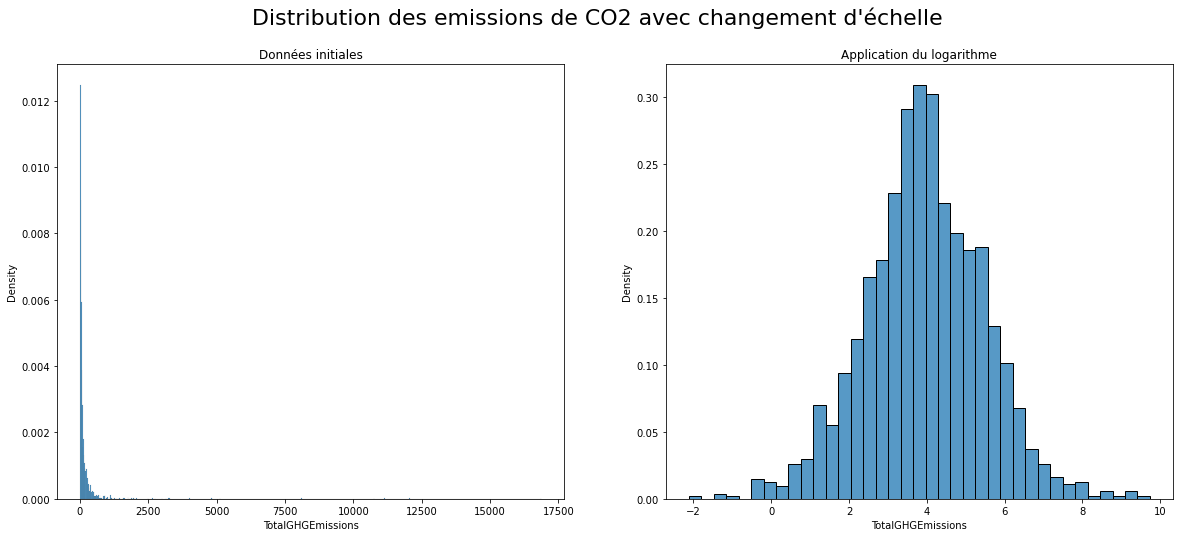

In [166]:
from sklearn.preprocessing import FunctionTransformer

logtransformer = FunctionTransformer(np.log, inverse_func = np.exp, check_inverse = True)
y1_log = logtransformer.transform(y1)

fig, axes = plt.subplots(nrows=1, ncols=2, sharex=False, sharey=False, figsize=(20,8))
sns.histplot(data=y1, x='TotalGHGEmissions', stat="density", ax=axes[0])
axes[0].set_title("Données initiales")
sns.histplot(data=y1_log, x='TotalGHGEmissions', stat="density", ax=axes[1])
axes[1].set_title("Application du logarithme")
plt.suptitle("Distribution des emissions de CO2 avec changement d'échelle", fontsize=22)
plt.show()

## Distribution de la consommation d'energie à l'échelle logarithmique

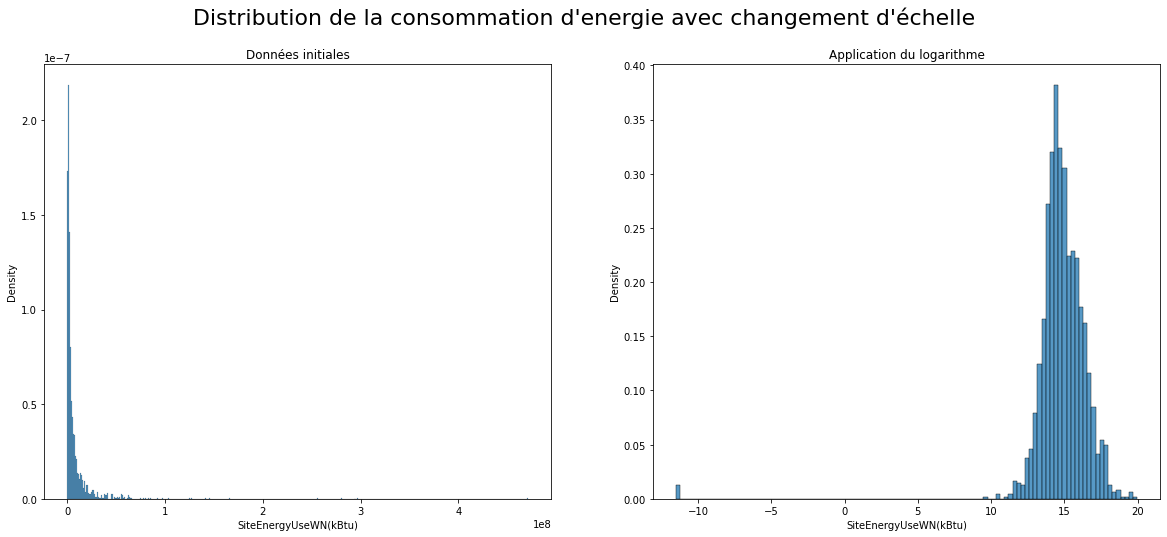

In [167]:
from sklearn.preprocessing import FunctionTransformer
#epsilon = 1e-5    
logtransformer = FunctionTransformer(np.log, inverse_func = np.exp, check_inverse = True)
y2_log = logtransformer.transform(y2)

fig, axes = plt.subplots(nrows=1, ncols=2, sharex=False, sharey=False, figsize=(20,8))
sns.histplot(data=y2, x='SiteEnergyUseWN(kBtu)', stat="density", ax=axes[0])
axes[0].set_title("Données initiales")
sns.histplot(data=y2_log, x='SiteEnergyUseWN(kBtu)', stat="density", ax=axes[1])
axes[1].set_title("Application du logarithme")
plt.suptitle("Distribution de la consommation d'energie avec changement d'échelle", fontsize=22)
plt.show()

## Modelisation

In [168]:
## Algorithme lineaire, non lineaire et methodes assemblistes

# Modèle Baseline : Régression linéaire multivariée

In [169]:
from sklearn.compose import TransformedTargetRegressor
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn import set_config
set_config(display='diagram')


param_mlr = {"regressor__fit_intercept": [True, False],
             "regressor__normalize": [True, False]}

mlr_grid_cv = Pipeline([
    ('preprocessor', preprocessor),
    ('grid_search_mlr', GridSearchCV(
                            TransformedTargetRegressor(
                                regressor=LinearRegression(), 
                                func=np.log, 
                                inverse_func=np.exp),
                            param_grid=param_mlr,
                            cv=5,
                            scoring=('r2','neg_mean_squared_error'),
                            return_train_score = True,
                            refit='neg_mean_squared_error',
                            n_jobs = -1))])

In [170]:
#Retour du meilleur scores RMSE 
#Stockage du dataframe de resultats du modèle
def model_scores(pip,step):
    df_results = pd.DataFrame.from_dict(pip.named_steps[step].cv_results_) \
                    .sort_values('rank_test_neg_mean_squared_error')
    
    best_nmse = pip.named_steps[step].best_score_
    best_rmse =np.sqrt(abs(best_nmse))
    best_r2 = np.mean(df_results[df_results.rank_test_r2 == 1]['mean_test_r2'])
    best_params = pip.named_steps[step].best_params_
    training_time = round((np.mean(df_results.mean_fit_time)*X_train.shape[0]),2)
    print("Meilleur score RMSE : {}\nMeilleur Score R2 : {}\nMeilleurs paramètres : {}\nTemps moyen d'entrainement : {}s"\
         .format(round(best_rmse,3), round(best_r2,3), best_params, training_time))
    return df_results

In [171]:
#Entrainement sur les 2 variables à expliquer :
GHG_mlr_model = mlr_grid_cv.fit(X_train, y1_train)
GHG_mlr_results = model_scores(GHG_mlr_model, 'grid_search_mlr')

C:\Users\Admin\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


Meilleur score RMSE : 34294.411
Meilleur Score R2 : -20162.066
Meilleurs paramètres : {'regressor__fit_intercept': False, 'regressor__normalize': True}
Temps moyen d'entrainement : 20.47s


In [172]:
SEUWN_mlr_model = mlr_grid_cv.fit(X_train, y2_train)
SEUWN_mlr_results = model_scores(SEUWN_mlr_model, 'grid_search_mlr')

C:\Users\Admin\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


Meilleur score RMSE : 89282303097945.58
Meilleur Score R2 : -17024868395465.434
Meilleurs paramètres : {'regressor__fit_intercept': False, 'regressor__normalize': True}
Temps moyen d'entrainement : 3.26s


## Lasso

In [173]:
from sklearn.compose import TransformedTargetRegressor
from sklearn.linear_model import Lasso
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn import set_config
set_config(display='diagram')


param_lasso = {"regressor__max_iter": [10, 50, 100, 500, 1000],
              "regressor__alpha": np.logspace(-5, 1, num=5),
              "regressor__fit_intercept": [True, False]}

lasso_grid_cv = Pipeline([
    ('preprocessor', preprocessor),
    ('grid_search_lasso', GridSearchCV(
                            TransformedTargetRegressor(
                                regressor=Lasso(), 
                                func=np.log, 
                                inverse_func=np.exp),
                            param_grid=param_lasso,
                            cv=5,
                            scoring=('r2','neg_mean_squared_error'),
                            return_train_score = True,
                            refit='neg_mean_squared_error',
                            n_jobs = -1))])

In [174]:
GHG_lasso_model = lasso_grid_cv.fit(X_train, y1_train)
GHG_lasso_results = model_scores(GHG_lasso_model, 'grid_search_lasso')

C:\Users\Admin\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


Meilleur score RMSE : 790.161
Meilleur Score R2 : -0.065
Meilleurs paramètres : {'regressor__alpha': 0.31622776601683794, 'regressor__fit_intercept': True, 'regressor__max_iter': 10}
Temps moyen d'entrainement : 4.44s


In [175]:
SEUWN_lasso_model = lasso_grid_cv.fit(X_train, y2_train)
SEUWN_lasso_results = model_scores(SEUWN_lasso_model, 'grid_search_lasso')

C:\Users\Admin\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


Meilleur score RMSE : 92040610.66
Meilleur Score R2 : -11.181
Meilleurs paramètres : {'regressor__alpha': 10.0, 'regressor__fit_intercept': True, 'regressor__max_iter': 10}
Temps moyen d'entrainement : 4.6s


## Ridge

In [176]:
from sklearn.compose import TransformedTargetRegressor
from sklearn.linear_model import Ridge
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn import set_config
set_config(display='diagram')

param_ridge = {"regressor__max_iter": [10, 50, 100, 500, 1000],
              "regressor__alpha": np.logspace(-5, 1, num=5),
              "regressor__fit_intercept": [True, False]}

ridge_grid_cv = Pipeline([
    ('preprocessor', preprocessor),
    ('grid_search_ridge', GridSearchCV(
                            TransformedTargetRegressor(
                                regressor=Ridge(), 
                                func=np.log, 
                                inverse_func=np.exp),
                            param_grid=param_ridge,
                            cv=5,
                            scoring=('r2','neg_mean_squared_error'),
                            return_train_score = True,
                            refit='neg_mean_squared_error',
                            n_jobs = -1))])

In [177]:
GHG_ridge_model = ridge_grid_cv.fit(X_train, y1_train)
GHG_ridge_results = model_scores(GHG_ridge_model, 'grid_search_ridge')

C:\Users\Admin\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


Meilleur score RMSE : 1794.044
Meilleur Score R2 : -18.981
Meilleurs paramètres : {'regressor__alpha': 0.01, 'regressor__fit_intercept': False, 'regressor__max_iter': 10}
Temps moyen d'entrainement : 2.97s


In [178]:
SEUWN_ridge_model = ridge_grid_cv.fit(X_train, y2_train)
SEUWN_ridge_results = model_scores(SEUWN_ridge_model, 'grid_search_ridge')

C:\Users\Admin\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


Meilleur score RMSE : 2244997196.98
Meilleur Score R2 : -6790.859
Meilleurs paramètres : {'regressor__alpha': 0.01, 'regressor__fit_intercept': False, 'regressor__max_iter': 10}
Temps moyen d'entrainement : 3.3s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.75252e-19): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


## Modèle ElasticNet

In [179]:
from sklearn.linear_model import ElasticNet

param_eNet = {"regressor__max_iter": [10, 100, 1000],
              "regressor__alpha": np.logspace(-4, 0, num=5),
              "regressor__l1_ratio": np.arange(0.0, 1.1, 0.1)}

eNet_grid_cv = Pipeline([
    ('preprocessor', preprocessor),
    ('grid_search_enet', GridSearchCV(
                            TransformedTargetRegressor(
                                regressor=ElasticNet(), 
                                func=np.log, 
                                inverse_func=np.exp),
                            param_grid=param_eNet,
                            cv=5,
                            scoring=('r2','neg_mean_squared_error'),
                            return_train_score = True,
                            refit='neg_mean_squared_error',
                            n_jobs = -1))])

In [180]:
GHG_eNet_model = eNet_grid_cv.fit(X_train, y1_train)
GHG_eNet_results = model_scores(GHG_eNet_model, 'grid_search_enet')

C:\Users\Admin\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


Meilleur score RMSE : 790.107
Meilleur Score R2 : -0.065
Meilleurs paramètres : {'regressor__alpha': 0.1, 'regressor__l1_ratio': 0.8, 'regressor__max_iter': 100}
Temps moyen d'entrainement : 4.89s


In [181]:
SEUWN_eNet_model = eNet_grid_cv.fit(X_train, y2_train)
SEUWN_eNet_results = model_scores(SEUWN_eNet_model, 'grid_search_enet')

C:\Users\Admin\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


Meilleur score RMSE : 647418680.631
Meilleur Score R2 : -877.055
Meilleurs paramètres : {'regressor__alpha': 1.0, 'regressor__l1_ratio': 1.0, 'regressor__max_iter': 10}
Temps moyen d'entrainement : 5.38s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.5610893268421933, tolerance: 0.6535838824949285
  model = cd_fast.enet_coordinate_descent(


##  Modèle Support Vector Regression (SVR)

In [182]:
from sklearn.svm import LinearSVR

param_svr = {'regressor__C' : np.logspace(-4, 0, 5),
             'regressor__epsilon' : [0, 0.01, 0.1, 0.5, 1, 2],
             'regressor__loss' : ["epsilon_insensitive","squared_epsilon_insensitive"],
             'regressor__max_iter': [10, 100, 1000]}

svr_grid_cv = Pipeline([
    ('preprocessor', preprocessor),
    ('grid_search_svr', GridSearchCV(
                            TransformedTargetRegressor(
                                regressor=LinearSVR(), 
                                func=np.log, 
                                inverse_func=np.exp),
                            param_grid=param_svr,
                            cv=5,
                            scoring=('r2','neg_mean_squared_error'),
                            refit='neg_mean_squared_error',
                            return_train_score = True,
                            n_jobs = -1))])

In [183]:
GHG_svr_model = svr_grid_cv.fit(X_train, y1_train)
GHG_svr_results = model_scores(GHG_svr_model, 'grid_search_svr')

C:\Users\Admin\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


Meilleur score RMSE : 66380.115
Meilleur Score R2 : -29325.176
Meilleurs paramètres : {'regressor__C': 0.0001, 'regressor__epsilon': 2, 'regressor__loss': 'squared_epsilon_insensitive', 'regressor__max_iter': 1000}
Temps moyen d'entrainement : 22.68s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [-6.32956247e+025 -1.95035668e+011 -3.55664305e+010 -3.89710919e+036
 -9.63546298e+018 -1.08032745e+038 -1.39935075e+033 -1.50902424e+161
 -3.01383072e+034             -inf -3.70822172e+019 -4.05757161e+129
 -4.82117999e+090 -5.50448897e+043 -2.34353490e+010 -3.65144740e+035
 -6.98452868e+017 -3.22579447e+261 -1.64271304e+030 -2.16629330e+017
 -3.63757999e+009 -1.03105284e+038 -6.93662031e+067 -2.33190166e+024
 -3.54737802e+036 -1.06410233e+098 -1.24059568e+033 -6.09934557e+030
 -3.95455636e+012 -1.70107201e+074 -1.97875977e+020 -3.41158393e+005
 -6.96544244e+014 -5.86159892e+025 -6.84627511e+033 -2.93251762e+004
 -3.09787952e+071 -9.39765464e+103 -1.63914217e+053 -9.13489389e+132
 -2.14525614e+040 -1.82070973e+012 -9.85191973e+065 -2.64536826e+027
 -1.41882235e+021 -1.08666626e+061 -5.75324495e+046 -1.75183237e+014
 -8.06104972e+039 -1.76910416

In [184]:
SEUWN_svr_model = svr_grid_cv.fit(X_train, y2_train)
SEUWN_svr_results = model_scores(SEUWN_svr_model, 'grid_search_svr')

C:\Users\Admin\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


Meilleur score RMSE : 25313470.205
Meilleur Score R2 : -0.21
Meilleurs paramètres : {'regressor__C': 0.0001, 'regressor__epsilon': 0, 'regressor__loss': 'epsilon_insensitive', 'regressor__max_iter': 10}
Temps moyen d'entrainement : 15.6s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


## Modèle RandomForestRegressor

In [185]:
from sklearn.ensemble import RandomForestRegressor

param_rfr = {'regressor__max_features' : ['sqrt', 'log2'],
             'regressor__max_depth': [5, 15, 25, 50],
             'regressor__min_samples_split': [2, 5, 10],
             'regressor__bootstrap' : [True, False],
             'regressor__min_samples_leaf': [1,2,5,10]}

rfr_grid_cv = Pipeline([
    ('preprocessor', preprocessor),
    ('grid_search_rfr', GridSearchCV(
                            TransformedTargetRegressor(
                                regressor=RandomForestRegressor(), 
                                func=np.log, 
                                inverse_func=np.exp),
                            param_grid=param_rfr,
                            cv=5,
                            scoring=('r2','neg_mean_squared_error'),
                            refit='neg_mean_squared_error',
                            return_train_score = True,
                            n_jobs = -1))])


In [186]:
GHG_rfr_model = rfr_grid_cv.fit(X_train, y1_train)
GHG_rfr_results = model_scores(GHG_rfr_model, 'grid_search_rfr')


C:\Users\Admin\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


Meilleur score RMSE : 787.357
Meilleur Score R2 : -0.049
Meilleurs paramètres : {'regressor__bootstrap': False, 'regressor__max_depth': 50, 'regressor__max_features': 'log2', 'regressor__min_samples_leaf': 2, 'regressor__min_samples_split': 2}
Temps moyen d'entrainement : 392.62s


In [188]:
SEUWN_rfr_model = rfr_grid_cv.fit(X_train, y2_train)
SEUWN_rfr_results = model_scores(SEUWN_rfr_model, 'grid_search_rfr')

C:\Users\Admin\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


Meilleur score RMSE : 17318148.958
Meilleur Score R2 : 0.5
Meilleurs paramètres : {'regressor__bootstrap': False, 'regressor__max_depth': 50, 'regressor__max_features': 'sqrt', 'regressor__min_samples_leaf': 1, 'regressor__min_samples_split': 2}
Temps moyen d'entrainement : 393.57s


##  Modèle gradient Boosting Regressor

In [189]:
from sklearn import ensemble
from sklearn.ensemble import GradientBoostingRegressor



param_gbr = {'regressor__max_features' : ['sqrt', 'log2'],
             'regressor__max_depth': [5, 15, 25, 50],
             'regressor__min_samples_split': [2, 5, 10],
             'regressor__min_samples_leaf': [1,2,5,10]}

gbr_grid_cv = Pipeline([
    ('preprocessor', preprocessor),
    ('grid_search_gbr', GridSearchCV(
                            TransformedTargetRegressor(
                                regressor=GradientBoostingRegressor(), 
                                func=np.log, 
                                inverse_func=np.exp),
                            param_grid=param_gbr,
                            cv=5,
                            scoring=('r2','neg_mean_squared_error'),
                            refit='neg_mean_squared_error',
                            return_train_score = True,
                            n_jobs = -1))])


In [190]:
GHG_gbr_model = gbr_grid_cv.fit(X_train, y1_train)
GHG_gbr_results = model_scores(GHG_gbr_model, 'grid_search_gbr')

C:\Users\Admin\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


Meilleur score RMSE : 784.763
Meilleur Score R2 : -0.027
Meilleurs paramètres : {'regressor__max_depth': 25, 'regressor__max_features': 'sqrt', 'regressor__min_samples_leaf': 5, 'regressor__min_samples_split': 10}
Temps moyen d'entrainement : 389.75s


In [191]:
SEUWN_gbr_model = gbr_grid_cv.fit(X_train, y2_train)
SEUWN_gbr_results = model_scores(SEUWN_gbr_model, 'grid_search_gbr')

C:\Users\Admin\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


Meilleur score RMSE : 16512659.31
Meilleur Score R2 : 0.548
Meilleurs paramètres : {'regressor__max_depth': 50, 'regressor__max_features': 'sqrt', 'regressor__min_samples_leaf': 1, 'regressor__min_samples_split': 10}
Temps moyen d'entrainement : 348.86s


## AdaBoostRegressor

In [192]:
from sklearn import ensemble
from sklearn.ensemble import AdaBoostRegressor



param_abr = {'regressor__n_estimators': [50, 100],
             'regressor__learning_rate' : [0.01,0.05,0.1,0.3,1],
             'regressor__loss' : ['linear', 'square', 'exponential']}


abr_grid_cv = Pipeline([
    ('preprocessor', preprocessor),
    ('grid_search_abr', GridSearchCV(
                            TransformedTargetRegressor(
                                regressor=AdaBoostRegressor(), 
                                func=np.log, 
                                inverse_func=np.exp),
                            param_grid=param_abr,
                            cv=5,
                            scoring=('r2','neg_mean_squared_error'),
                            refit='neg_mean_squared_error',
                            return_train_score = True,
                            n_jobs = -1))])


In [193]:
GHG_abr_model = abr_grid_cv.fit(X_train, y1_train)
GHG_abr_results = model_scores(GHG_abr_model, 'grid_search_abr')

C:\Users\Admin\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


Meilleur score RMSE : 788.538
Meilleur Score R2 : -0.063
Meilleurs paramètres : {'regressor__learning_rate': 1, 'regressor__loss': 'exponential', 'regressor__n_estimators': 100}
Temps moyen d'entrainement : 309.9s


In [194]:
SEUWN_abr_model = abr_grid_cv.fit(X_train, y2_train)
SEUWN_abr_results = model_scores(SEUWN_abr_model, 'grid_search_abr')

C:\Users\Admin\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


Meilleur score RMSE : 20848186.87
Meilleur Score R2 : 0.326
Meilleurs paramètres : {'regressor__learning_rate': 0.01, 'regressor__loss': 'linear', 'regressor__n_estimators': 50}
Temps moyen d'entrainement : 276.1s


## DecisionTreeRegressor

In [195]:
from sklearn.tree import DecisionTreeRegressor



param_dtr = {'regressor__criterion':['mse','mae'],
             'regressor__max_features':['auto', 'sqrt', 'log2'],
             'regressor__max_depth':[1, 10, 50, 100,150, 200]}

dtr_grid_cv = Pipeline([
    ('preprocessor', preprocessor),
    ('grid_search_dtr', GridSearchCV(
                            TransformedTargetRegressor(
                                regressor=DecisionTreeRegressor(), 
                                func=np.log, 
                                inverse_func=np.exp),
                            param_grid=param_dtr,
                            cv=5,
                            scoring=('r2','neg_mean_squared_error'),
                            refit='neg_mean_squared_error',
                            return_train_score = True,
                            n_jobs = -1))])


In [196]:
GHG_dtr_model = dtr_grid_cv.fit(X_train, y1_train)
GHG_dtr_results = model_scores(GHG_dtr_model, 'grid_search_dtr')

C:\Users\Admin\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


Meilleur score RMSE : 789.934
Meilleur Score R2 : -0.063
Meilleurs paramètres : {'regressor__criterion': 'mse', 'regressor__max_depth': 1, 'regressor__max_features': 'auto'}
Temps moyen d'entrainement : 52.9s


In [197]:
SEUWN_dtr_model = dtr_grid_cv.fit(X_train, y2_train)
SEUWN_dtr_results = model_scores(SEUWN_dtr_model, 'grid_search_dtr')

C:\Users\Admin\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


Meilleur score RMSE : 17060593.045
Meilleur Score R2 : 0.411
Meilleurs paramètres : {'regressor__criterion': 'mse', 'regressor__max_depth': 50, 'regressor__max_features': 'log2'}
Temps moyen d'entrainement : 26.15s


## Modèle XGBoost 

In [198]:
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV

param_xgb = {'regressor__learning_rate' : [0.001, 0.01, 0.1, 0.2, 0,3],
             'regressor__gamma': [0, 0.25, 0.5, 1.0],
             'regressor__max_depth': [6, 10, 15, 20],
             'regressor__min_child_weight' : [0.5, 1.0, 3.0, 5.0, 7.0, 10.0],
             'regressor__n_estimators': [25, 50, 100, 500, 1000]}

xgb_grid_cv = Pipeline([
    ('preprocessor', preprocessor),
    ('grid_search_xgb', RandomizedSearchCV(
                            TransformedTargetRegressor(
                                regressor=xgb.XGBRegressor(tree_method='gpu_hist'), 
                                func=np.log, 
                                inverse_func=np.exp),
                            param_distributions=param_xgb,
                            n_iter=20,
                            cv=5,
                            scoring=('r2','neg_mean_squared_error'),
                            refit='neg_mean_squared_error',
                            return_train_score = True,
                            n_jobs = -1))])


In [199]:
GHG_xgb_model = xgb_grid_cv.fit(X_train, y1_train)
GHG_xgb_results = model_scores(GHG_xgb_model, 'grid_search_xgb')

C:\Users\Admin\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [        nan -0.05872163         nan         nan -0.14715778 -0.13794079
 -0.05722861 -0.06507069 -0.04873287 -0.05241418 -0.14715778 -0.05047886
 -0.14655904 -0.06237986 -0.05871564 -0.14715778 -0.06576866 -0.05877081
 -0.13806833 -0.14715778]
  warnings.warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the train scores are non-finite: [            nan  2.46005628e-01             nan             nan
 -5.92735262e-02 -5.58354343e-02  2.36493985e-01  2.39990080e-02
  1.05178754e-01  1.59212292e-01 -5.92735262e-02  1.05815414e-01
 -5.90723531e-02  2.4

Meilleur score RMSE : 786.274
Meilleur Score R2 : -0.049
Meilleurs paramètres : {'regressor__n_estimators': 50, 'regressor__min_child_weight': 0.5, 'regressor__max_depth': 15, 'regressor__learning_rate': 0.1, 'regressor__gamma': 0.25}
Temps moyen d'entrainement : 17872.53s


In [200]:
SEUWN_xgb_model = xgb_grid_cv.fit(X_train, y2_train)
SEUWN_xgb_results = model_scores(SEUWN_xgb_model, 'grid_search_xgb')

C:\Users\Admin\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [-2.10208556e-01 -2.10208512e-01  5.66144630e-01 -2.10208556e-01
             nan  4.52053055e-01 -3.07779044e+00 -7.88965055e-02
  4.83925302e-01  4.66083384e-01 -2.10208651e-01  4.66083384e-01
  4.94437614e-01 -3.48874681e+02 -8.79906430e-01  5.08150952e-01
 -2.10208556e-01 -1.73202113e+01 -2.84569283e-01 -2.10208556e-01]
  warnings.warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the train scores are non-finite: [-0.12990432 -0.12990429  0.99999022 -0.12990432         nan  0.82323264
  0.62221815  0.99823544  0.73515618  0.70400606 -0.12990437  

Meilleur score RMSE : 16014581.947
Meilleur Score R2 : 0.566
Meilleurs paramètres : {'regressor__n_estimators': 1000, 'regressor__min_child_weight': 0.5, 'regressor__max_depth': 6, 'regressor__learning_rate': 0.1, 'regressor__gamma': 0}
Temps moyen d'entrainement : 26533.96s


#  Sélection du meilleur modèle

## Modèle de prédiction des émissions de CO2

In [60]:
metrics = ['mean_fit_time', 'mean_score_time',
           'mean_test_neg_mean_squared_error',
           'mean_train_neg_mean_squared_error']

GHG_compare_metrics = pd.concat([pd.DataFrame(GHG_rfr_results[metrics].mean(), columns=['RandomForest']),
           pd.DataFrame(GHG_gbr_results[metrics].mean(), columns=['GradientBoostingRegressor']),
           pd.DataFrame(GHG_xgb_results[metrics].mean(), columns=['XGBRegressor']),    
           pd.DataFrame(GHG_dtr_results[metrics].mean(), columns=['DecisionTreeRegressor']),
           pd.DataFrame(GHG_abr_results[metrics].mean(), columns=['AdaBoostRegressor']),                      
           pd.DataFrame(GHG_svr_results[metrics].mean(), columns=['SVR']),
           pd.DataFrame(GHG_eNet_results[metrics].mean(), columns=['ElasticNet']),
           pd.DataFrame(GHG_lasso_results[metrics].mean(), columns=['Lasso']),                      
           pd.DataFrame(GHG_ridge_results[metrics].mean(), columns=['Ridge']),                     
           pd.DataFrame(GHG_mlr_results[metrics].mean(), columns=['LinearRegression'])
          ], axis=1)
GHG_final_metrics_compare = pd.DataFrame(columns=metrics, 
                                     index=['RandomForest','GradientBoostingRegressor','XGBRegressor',
                                            'DecisionTreeRegressor',
                                            'AdaBoostRegressor', 'SVR','ElasticNet',
                                            'Lasso', 'Ridge',
                                            'LinearRegression'])
for m in metrics:
    GHG_final_metrics_compare[m] = GHG_compare_metrics.loc[m]

In [61]:
GHG_final_metrics_compare

,mean_fit_time,mean_score_time,mean_test_neg_mean_squared_error,mean_train_neg_mean_squared_error
RandomForest,0.284566,0.017040,-6.352852e+05,-5.770934e+05
GradientBoostingRegressor,0.259897,0.005913,-6.367546e+05,-2.481853e+05
XGBRegressor,11.057215,0.012897,-6.424254e+05,-4.954909e+05
DecisionTreeRegressor,0.035862,0.002596,-1.347430e+06,-1.824350e+05
AdaBoostRegressor,0.206198,0.011649,-6.353308e+05,-6.213824e+05
SVR,0.017068,0.002643,-inf,-inf
ElasticNet,0.003823,0.002421,-6.839075e+05,-6.328736e+05
Lasso,0.003485,0.002505,-2.637563e+09,-1.340267e+10
Ridge,0.002217,0.002130,-1.423971e+08,-2.090668e+09
LinearRegression,0.009977,0.004289,-7.524408e+05,-6.321065e+05


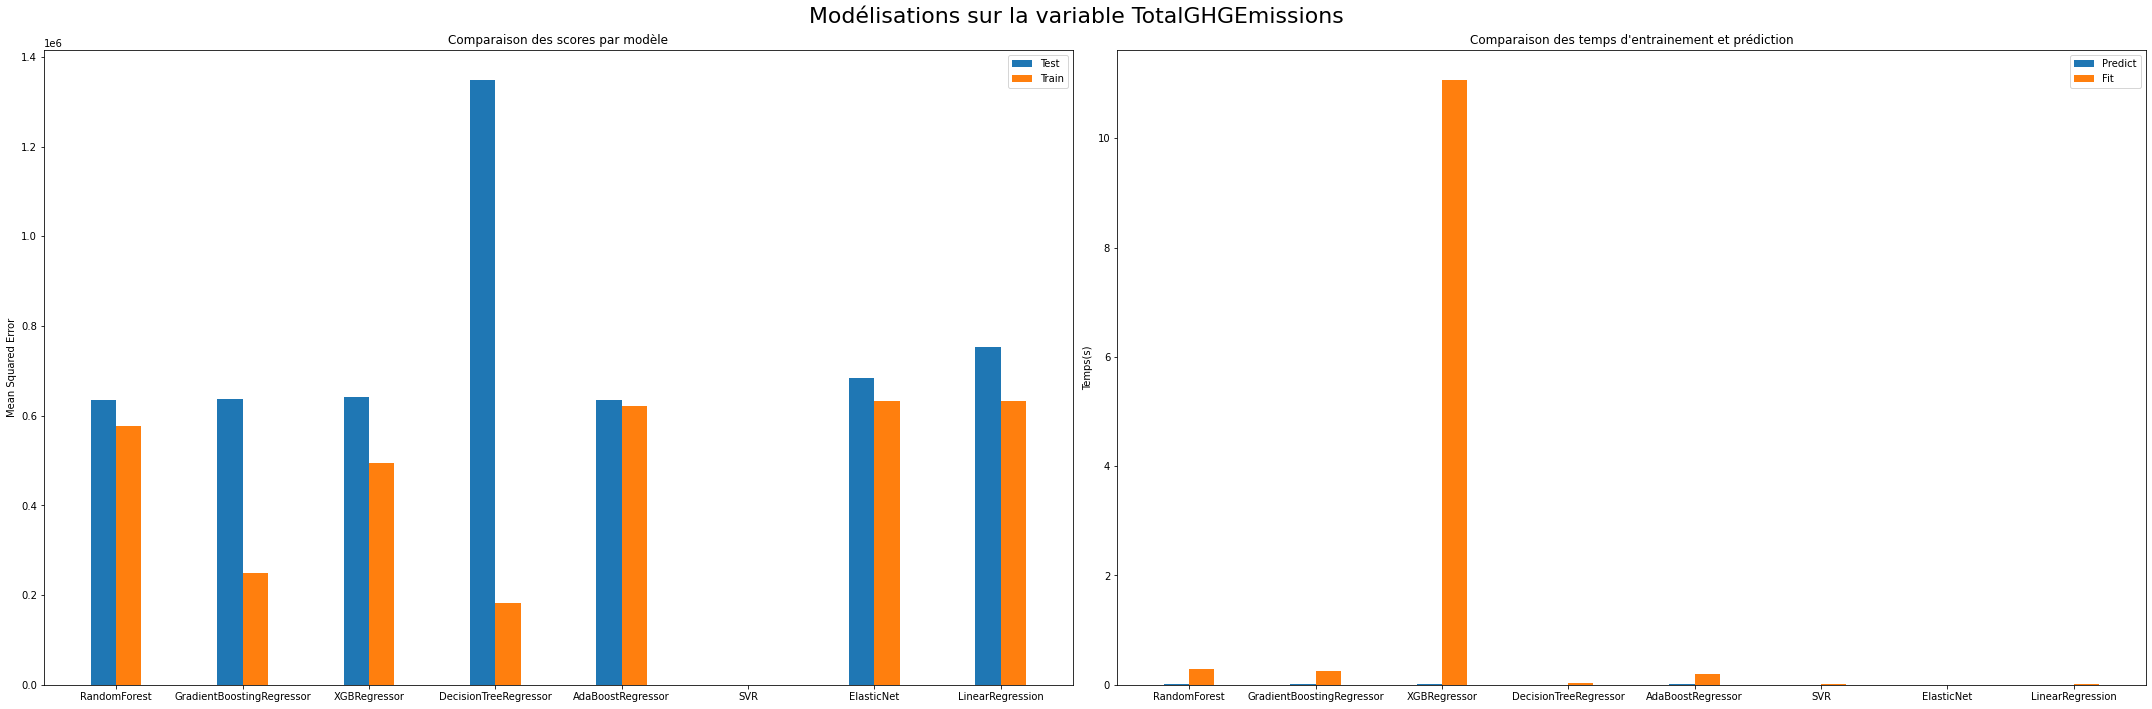

In [66]:
GHG_final_metrics_compare = GHG_final_metrics_compare[GHG_final_metrics_compare.index != 'LinearSVR']
GHG_final_metrics_compare = GHG_final_metrics_compare[GHG_final_metrics_compare.index != 'Ridge']
GHG_final_metrics_compare = GHG_final_metrics_compare[GHG_final_metrics_compare.index != 'Lasso']

x = np.arange(len(GHG_final_metrics_compare.index))
width = 0.2

fig, ax = plt.subplots(1,2,figsize=(30,10), sharey=False, sharex=False)

scores1 = ax[0].bar(x - width/2, -1*GHG_final_metrics_compare['mean_test_neg_mean_squared_error'], width, label='Test')
scores2 = ax[0].bar(x + width/2, -1*GHG_final_metrics_compare['mean_train_neg_mean_squared_error'], width, label='Train')
ax[0].set_ylabel('Mean Squared Error')
ax[0].set_title('Comparaison des scores par modèle')
ax[0].set_xticks(x)
ax[0].set_xticklabels(GHG_final_metrics_compare.index)
ax[0].legend()

times1 = ax[1].bar(x - width/2, GHG_final_metrics_compare['mean_score_time'], width, label='Predict')
times2 = ax[1].bar(x + width/2, GHG_final_metrics_compare['mean_fit_time'], width, label='Fit')
ax[1].set_ylabel('Temps(s)')
ax[1].set_title("Comparaison des temps d'entrainement et prédiction")
ax[1].set_xticks(x)
ax[1].set_xticklabels(GHG_final_metrics_compare.index)
ax[1].legend()

plt.suptitle("Modélisations sur la variable TotalGHGEmissions", fontsize=22)
fig.tight_layout()

plt.show()

In [67]:
#Fonction d'affichage des scores de GridSearch pour chacun des paramètres
def plot_search_results(grid, title): 
       
    ## Résultats de la GridSearch
    results = grid.cv_results_
    means_test = results['mean_test_neg_mean_squared_error']
    stds_test = results['std_test_neg_mean_squared_error']
    means_train = results['mean_train_neg_mean_squared_error']
    stds_train = results['std_train_neg_mean_squared_error']

    ## Index de valeurs par hyper-paramètre
    masks=[]
    masks_names= list(grid.best_params_.keys())
    for p_k, p_v in grid.best_params_.items():
        masks.append(list(results['param_'+p_k].data==p_v))

    params=grid.param_grid

    
    ## Plot des résultats
    fig, ax = plt.subplots(1,len(params),sharex='none', sharey='all',figsize=(20,5))
    fig.suptitle('Scores par paramètres pour la variable {}'.format(title), 
                 fontsize=22)
    fig.text(0.04, 0.5, 'NEG MEAN SQUARED ERROR SCORE', va='center', rotation='vertical')
    pram_preformace_in_best = {}
    for i, p in enumerate(masks_names):
        m = np.stack(masks[:i] + masks[i+1:])
        pram_preformace_in_best
        best_parms_mask = m.all(axis=0)
        best_index = np.where(best_parms_mask)[0]
        x = np.array(params[p])
        y_1 = np.array(means_test[best_index])
        e_1 = np.array(stds_test[best_index])
        y_2 = np.array(means_train[best_index])
        e_2 = np.array(stds_train[best_index])
        ax[i].errorbar(x, y_1, e_1, linestyle='--', marker='o', label='test', color="#2cb7b0")
        ax[i].errorbar(x, y_2, e_2, linestyle='--', marker='o', label='train', color="#337da4")
        ax[i].set_xlabel(p.upper())

    plt.legend()
    plt.show()
    
    print("\nRappel des meilleurs paramètres :\n{}".format(grid.best_params_))

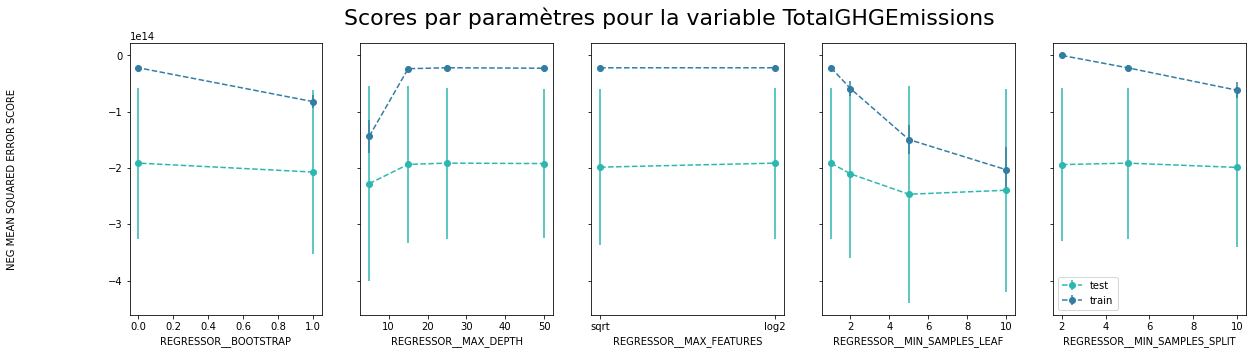


Rappel des meilleurs paramètres :
{'regressor__bootstrap': False, 'regressor__max_depth': 25, 'regressor__max_features': 'log2', 'regressor__min_samples_leaf': 1, 'regressor__min_samples_split': 5}


In [68]:
plot_search_results(GHG_rfr_model.named_steps['grid_search_rfr'], title="TotalGHGEmissions")

 ## L'importance des variables sur le modèle RandomForestRegressor(Emission de CO2)

<ipython-input-164-9225fb64e142>:35: UserWarning: Transformer numeric (type RobustScaler) does not provide get_feature_names. Will return input column names if available
  warnings.warn("Transformer %s (type %s) does not "


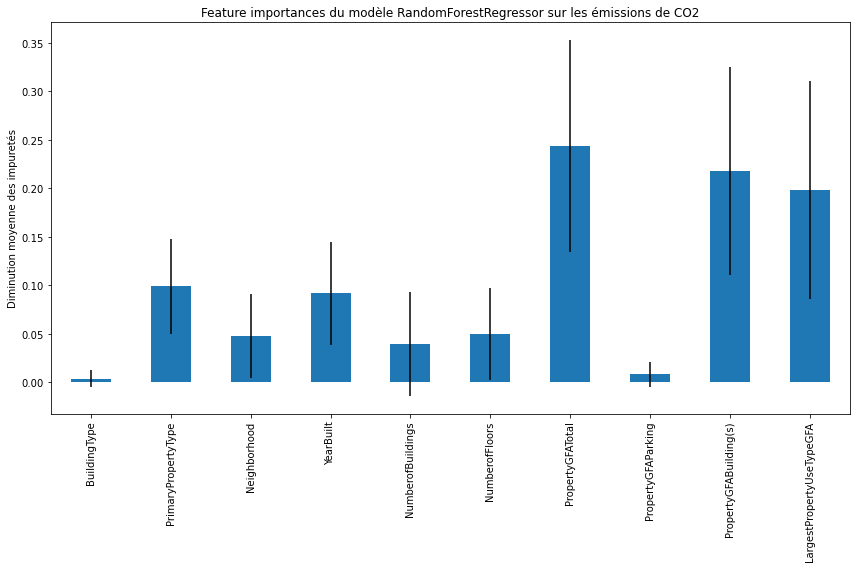

In [202]:
feature_importance = GHG_rfr_model.named_steps['grid_search_rfr'].best_estimator_.regressor_.feature_importances_ 
features_names = get_feature_names(GHG_rfr_model.named_steps['preprocessor'])
std = np.std([
    tree.feature_importances_ for tree in GHG_rfr_model.named_steps['grid_search_rfr'].best_estimator_.regressor_], axis=0)
df_feature_importance = pd.Series(feature_importance, index=features_names)

fig, ax = plt.subplots(figsize=(12,8))
df_feature_importance.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances du modèle RandomForestRegressor sur les émissions de CO2")
ax.set_ylabel("Diminution moyenne des impuretés")
fig.tight_layout()

## Modèle de prédiction des consommations d'énergie

In [70]:
SEUWN_compare_metrics = pd.concat([pd.DataFrame(SEUWN_rfr_results[metrics].mean(), columns=['RandomForest']),
           pd.DataFrame(SEUWN_gbr_results[metrics].mean(), columns=['GradientBoostingRegressor']),
           pd.DataFrame(SEUWN_xgb_results[metrics].mean(), columns=['XGBRegressor']),    
           pd.DataFrame(SEUWN_dtr_results[metrics].mean(), columns=['DecisionTreeRegressor']),
           pd.DataFrame(SEUWN_abr_results[metrics].mean(), columns=['AdaBoostRegressor']),                      
           pd.DataFrame(SEUWN_svr_results[metrics].mean(), columns=['SVR']),
           pd.DataFrame(SEUWN_eNet_results[metrics].mean(), columns=['ElasticNet']),
           pd.DataFrame(SEUWN_lasso_results[metrics].mean(), columns=['Lasso']),                      
           pd.DataFrame(SEUWN_ridge_results[metrics].mean(), columns=['Ridge']),                     
           pd.DataFrame(SEUWN_mlr_results[metrics].mean(), columns=['LinearRegression'])
          ], axis=1)
SEUWN_final_metrics_compare = pd.DataFrame(columns=metrics, 
                                     index=['RandomForest','GradientBoostingRegressor','XGBRegressor',
                                            'DecisionTreeRegressor', 'AdaBoostRegressor',
                                             'SVR','ElasticNet',
                                            'Lasso', 'Ridge',
                                            'LinearRegression'])
for m in metrics:
    SEUWN_final_metrics_compare[m] = SEUWN_compare_metrics.loc[m]

In [71]:
SEUWN_final_metrics_compare

,mean_fit_time,mean_score_time,mean_test_neg_mean_squared_error,mean_train_neg_mean_squared_error
RandomForest,0.286069,0.018991,-2.366111e+14,-1.562007e+14
GradientBoostingRegressor,0.234481,0.006212,-2.161719e+16,-8.620866e+13
XGBRegressor,14.143465,0.008264,-4.358066e+14,-2.454439e+14
DecisionTreeRegressor,0.020092,0.002696,-3.006071e+14,-6.148376e+13
AdaBoostRegressor,0.205899,0.011616,-2.985333e+14,-2.809134e+14
SVR,0.011178,0.002343,-4.304603e+14,-4.307676e+14
ElasticNet,0.004164,0.002435,-2.891462e+38,-5.979943e+16
Lasso,0.003697,0.002562,-2.111328e+38,-3.632500e+36
Ridge,0.002560,0.002343,-4.121638e+38,-1.347366e+35
LinearRegression,0.002398,0.002046,-6.411060e+38,-8.310732e+16


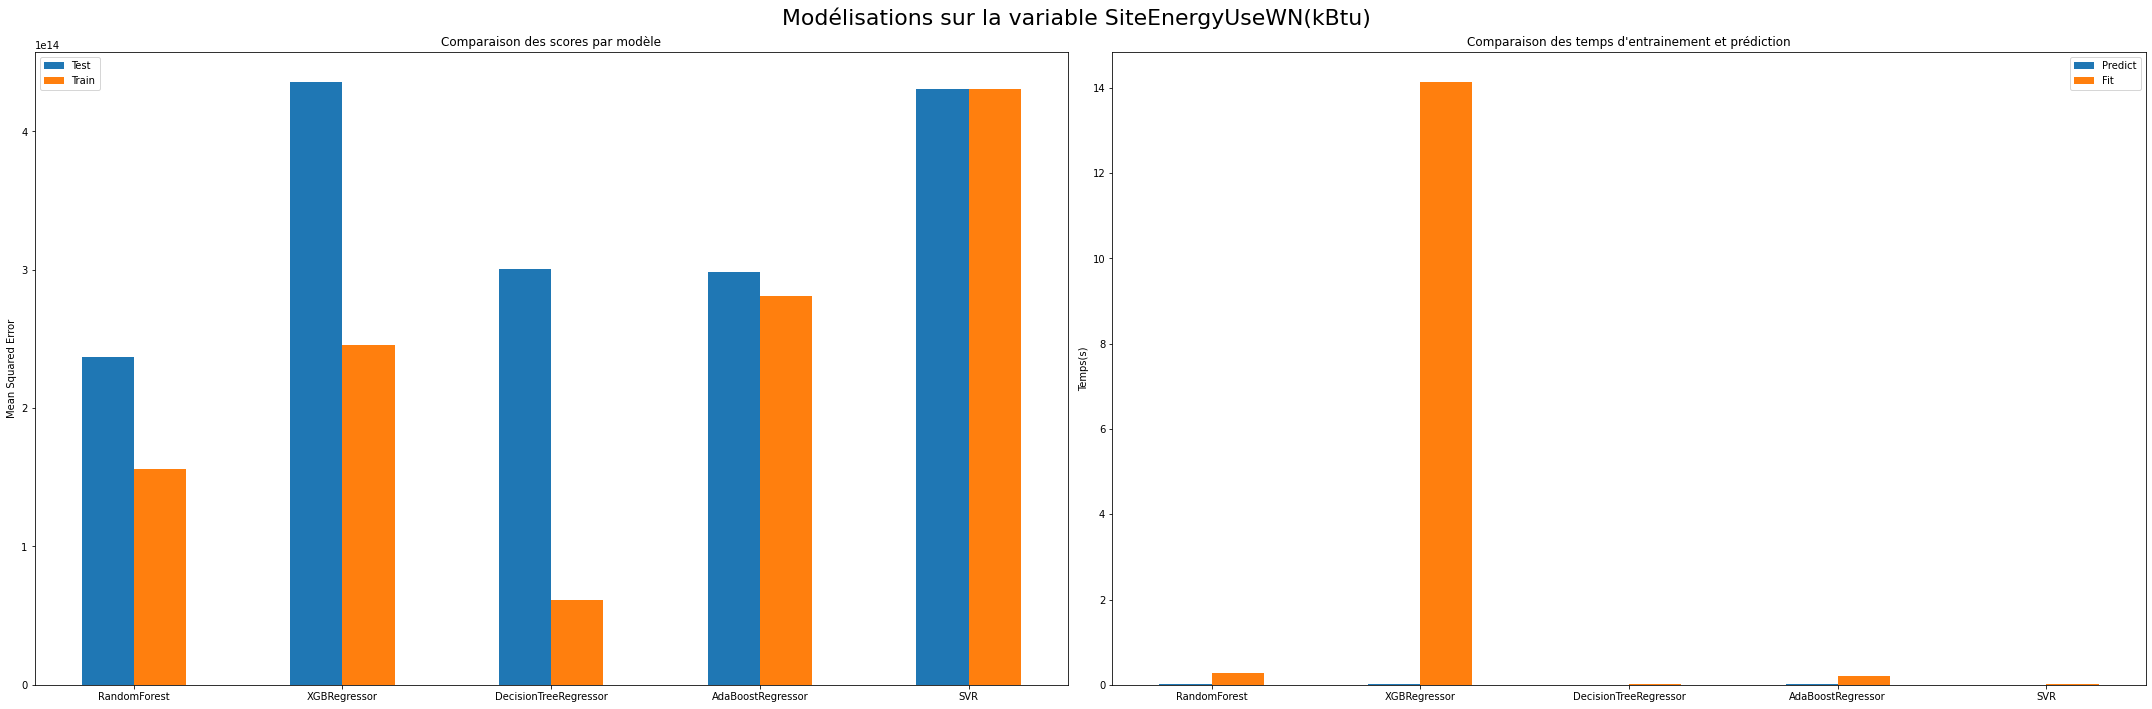

In [72]:
SEUWN_final_metrics_compare = SEUWN_final_metrics_compare[SEUWN_final_metrics_compare.index != 'LinearRegression'] 
SEUWN_final_metrics_compare = SEUWN_final_metrics_compare[SEUWN_final_metrics_compare.index != 'GradientBoostingRegressor']
SEUWN_final_metrics_compare = SEUWN_final_metrics_compare[SEUWN_final_metrics_compare.index != 'Ridge']
SEUWN_final_metrics_compare = SEUWN_final_metrics_compare[SEUWN_final_metrics_compare.index != 'Lasso']
SEUWN_final_metrics_compare = SEUWN_final_metrics_compare[SEUWN_final_metrics_compare.index != 'ElasticNet']

x = np.arange(len(SEUWN_final_metrics_compare.index))
width = 0.25

fig, ax = plt.subplots(1,2,figsize=(30,10), sharey=False, sharex=False)

scores1 = ax[0].bar(x - width/2, -1*SEUWN_final_metrics_compare['mean_test_neg_mean_squared_error'], width, label='Test')
scores2 = ax[0].bar(x + width/2, -1*SEUWN_final_metrics_compare['mean_train_neg_mean_squared_error'], width, label='Train')
ax[0].set_ylabel('Mean Squared Error')
ax[0].set_title('Comparaison des scores par modèle')
ax[0].set_xticks(x)
ax[0].set_xticklabels(SEUWN_final_metrics_compare.index)
ax[0].legend()


times1 = ax[1].bar(x - width/2, SEUWN_final_metrics_compare['mean_score_time'], width, label='Predict')
times2 = ax[1].bar(x + width/2, SEUWN_final_metrics_compare['mean_fit_time'], width, label='Fit')
ax[1].set_ylabel('Temps(s)')
ax[1].set_title("Comparaison des temps d'entrainement et prédiction")
ax[1].set_xticks(x)
ax[1].set_xticklabels(SEUWN_final_metrics_compare.index)
ax[1].legend()


plt.suptitle("Modélisations sur la variable SiteEnergyUseWN(kBtu)", fontsize=22)
fig.tight_layout()

plt.show()

In [73]:
#Fonction d'affichage des scores de GridSearch pour chacun des paramètres
def plot_search_results(grid, title): 
       
    ## Résultats de la GridSearch
    results = grid.cv_results_
    means_test = results['mean_test_neg_mean_squared_error']
    stds_test = results['std_test_neg_mean_squared_error']
    means_train = results['mean_train_neg_mean_squared_error']
    stds_train = results['std_train_neg_mean_squared_error']

    ## Index de valeurs par hyper-paramètre
    masks=[]
    masks_names= list(grid.best_params_.keys())
    for p_k, p_v in grid.best_params_.items():
        masks.append(list(results['param_'+p_k].data==p_v))

    params=grid.param_grid

    
    ## Plot des résultats
    fig, ax = plt.subplots(1,len(params),sharex='none', sharey='all',figsize=(20,5))
    fig.suptitle('Scores par paramètres pour la variable {}'.format(title), 
                 fontsize=22)
    fig.text(0.04, 0.5, 'NEG MEAN SQUARED ERROR SCORE', va='center', rotation='vertical')
    pram_preformace_in_best = {}
    for i, p in enumerate(masks_names):
        m = np.stack(masks[:i] + masks[i+1:])
        pram_preformace_in_best
        best_parms_mask = m.all(axis=0)
        best_index = np.where(best_parms_mask)[0]
        x = np.array(params[p])
        y_1 = np.array(means_test[best_index])
        e_1 = np.array(stds_test[best_index])
        y_2 = np.array(means_train[best_index])
        e_2 = np.array(stds_train[best_index])
        ax[i].errorbar(x, y_1, e_1, linestyle='--', marker='o', label='test', color="#2cb7b0")
        ax[i].errorbar(x, y_2, e_2, linestyle='--', marker='o', label='train', color="#337da4")
        ax[i].set_xlabel(p.upper())

    plt.legend()
    plt.show()
    
    print("\nRappel des meilleurs paramètres :\n{}".format(grid.best_params_))

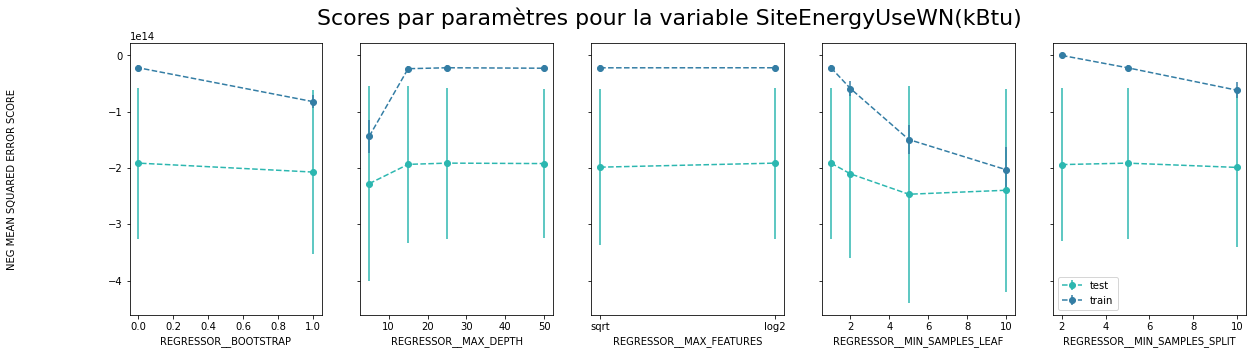


Rappel des meilleurs paramètres :
{'regressor__bootstrap': False, 'regressor__max_depth': 25, 'regressor__max_features': 'log2', 'regressor__min_samples_leaf': 1, 'regressor__min_samples_split': 5}


In [75]:
plot_search_results(SEUWN_rfr_model.named_steps['grid_search_rfr'], title="SiteEnergyUseWN(kBtu)")

 ## L'importance des variables sur le modèle RandomForestRegressor(Consommation d'énergie)

<ipython-input-164-9225fb64e142>:35: UserWarning: Transformer numeric (type RobustScaler) does not provide get_feature_names. Will return input column names if available
  warnings.warn("Transformer %s (type %s) does not "


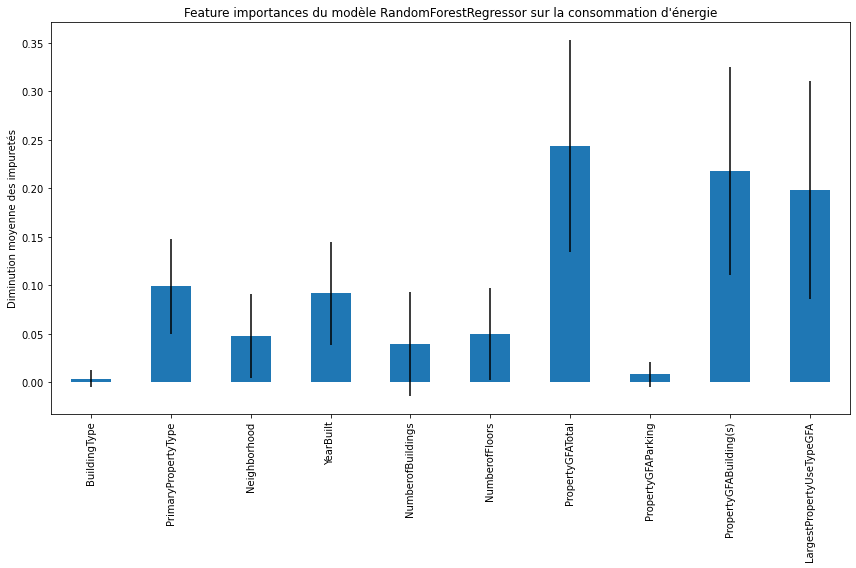

In [203]:
feature_importance = SEUWN_rfr_model.named_steps['grid_search_rfr'].best_estimator_.regressor_.feature_importances_ 
features_names = get_feature_names(SEUWN_rfr_model.named_steps['preprocessor'])
std = np.std([
    tree.feature_importances_ for tree in SEUWN_rfr_model.named_steps['grid_search_rfr'].best_estimator_.regressor_], axis=0)
df_feature_importance = pd.Series(feature_importance, index=features_names)

fig, ax = plt.subplots(figsize=(12,8))
df_feature_importance.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances du modèle RandomForestRegressor sur la consommation d'énergie")
ax.set_ylabel("Diminution moyenne des impuretés")
fig.tight_layout()

## Les  performances des modèles sélectionnés

In [77]:
## les emissions de CO2

In [79]:
def metrics_model1(y1_test, y1_pred):
    y1_test, y1_pred = np.array(y1_test), np.array(y1_pred)
    diff = y1_test - y1_pred
    mse = np.mean((diff)**2)
    rmse = np.sqrt(mse)
    #r2 = 1-(sum(diff**2)/sum((y1_test-np.mean(y1_test))**2))
    dict_metrics = {"Métrique":["MSE"], "Résultats":[mse]}
    df_metrics = pd.DataFrame(dict_metrics)
    return df_metrics
#rmse = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred_cv))

In [80]:
def plot_pred_test1(y1_test, y1_pred, color=None, title=None):
    X_plot = [y1_test.min(), y1_test.max()]
    fig = plt.figure(figsize=(12,8))
    plt.scatter(y1_test, y1_pred, color=color, alpha=.6)
    plt.plot(X_plot, X_plot, color='r')
    plt.xlabel("Valeurs réélles")
    plt.ylabel("Valeurs prédites")
    plt.title("Valeurs prédites VS valeurs réélles | Variable {}".format(title), 
               fontsize=18)
    plt.show()

In [81]:
#Modèle avec les meilleurs paramètres pour les émissions de CO2

import time
start_time = time.time()

GHG_pred = GHG_rfr_model.predict(X_test)

print("Temps d'execution de l'agorithme : {:.2} s.".format((time.time() - start_time)))


Temps d'execution de l'agorithme : 0.018 s.


In [82]:
#Calcul des métriques pour les émissions de CO2
GHGmetrics = metrics_model1(y1_test,GHG_pred)
GHGmetrics

,Métrique,Résultats
0,MSE,1.145747e+14


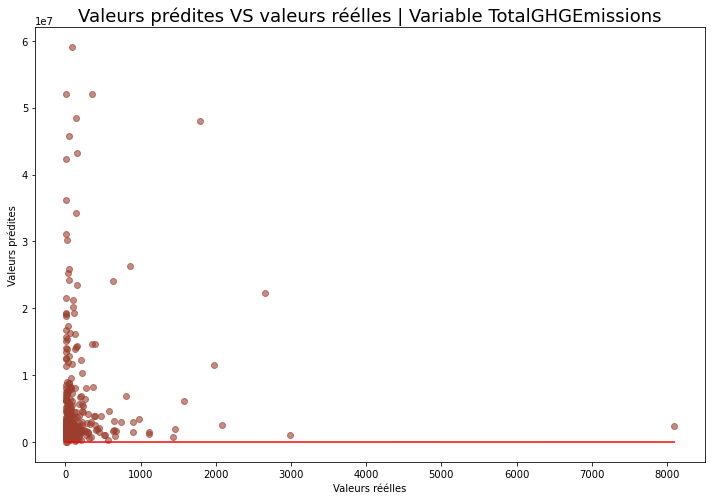

In [83]:
#Affichage des valeurs prédites vs valeurs réélles pour émissions de CO2
plot_pred_test1(y1_test,GHG_pred, color="#9C3E2D", title="TotalGHGEmissions")

In [84]:
GHG_test_results = GHG_rfr_results[['split0_test_neg_mean_squared_error',
                'split1_test_neg_mean_squared_error',
                'split2_test_neg_mean_squared_error',
                'split3_test_neg_mean_squared_error',
                'split4_test_neg_mean_squared_error',
                ]][GHG_rfr_results['rank_test_neg_mean_squared_error']==1].values
GHG_train_results = GHG_rfr_results[['split0_train_neg_mean_squared_error',
                'split1_train_neg_mean_squared_error',
                'split2_train_neg_mean_squared_error',
                'split3_train_neg_mean_squared_error',
                'split4_train_neg_mean_squared_error',
                ]][GHG_rfr_results['rank_test_neg_mean_squared_error']==1].values

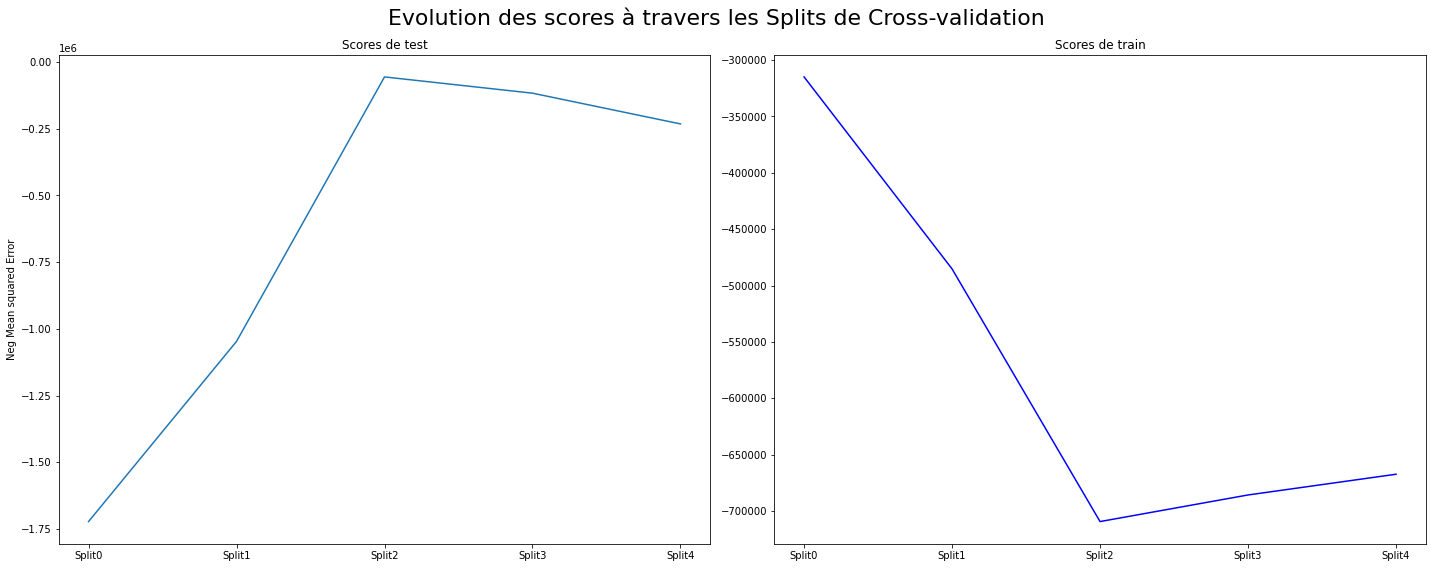

In [85]:
x = np.arange(0,5,1)
fig, ax = plt.subplots(1,2, figsize=(20,8), sharey=False, sharex=False)
ax[0].plot(range(0,5), GHG_test_results.reshape(-1))
ax[0].set_xticks(x)
ax[0].set_xticklabels(["Split"+str(n) for n in range(0,5)])
ax[0].set_ylabel('Neg Mean squared Error')
ax[0].set_title('Scores de test')

ax[1].plot(range(0,5), GHG_train_results.reshape(-1), color='b')
ax[1].set_xticks(x)
ax[1].set_xticklabels(["Split"+str(n) for n in range(0,5)])
ax[1].set_title('Scores de train')

plt.suptitle("Evolution des scores à travers les Splits de Cross-validation", fontsize=22)
fig.tight_layout()

plt.show()

In [86]:
## la consommation d'énergie

In [87]:
def metrics_model2(y2_test, y2_pred):
    y2_test, y2_pred = np.array(y2_test), np.array(y2_pred)
    diff = y2_test - y2_pred
    mse = np.mean((diff)**2)
    rmse = np.sqrt(mse)
    #r2 = 1-(sum(diff**2)/sum((y2_test-np.mean(y2_test))**2))
    dict_metrics = {"Métrique":["MSE"], "Résultats":[mse]}
    df_metrics = pd.DataFrame(dict_metrics)
    return df_metrics
#rmse = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred_cv))

In [88]:
def plot_pred_test2(y2_test, y2_pred, color=None, title=None):
    X_plot = [y2_test.min(), y2_test.max()]
    fig = plt.figure(figsize=(12,8))
    plt.scatter(y2_test, y2_pred, color=color, alpha=.6)
    plt.plot(X_plot, X_plot, color='r')
    plt.xlabel("Valeurs réélles")
    plt.ylabel("Valeurs prédites")
    plt.title("Valeurs prédites VS valeurs réélles | Variable {}".format(title), 
               fontsize=18)
    plt.show()

In [89]:
start_time = time.time()

SEUWN_pred = SEUWN_rfr_model.predict(X_test)

print("Temps d'execution de l'agorithme : {:.2} s.".format((time.time() - start_time)))

Temps d'execution de l'agorithme : 0.019 s.


In [91]:
#Calcul des métriques pour les émissions de CO2
SEUWNmetrics = metrics_model2(y2_test,SEUWN_pred)
SEUWNmetrics

,Métrique,Résultats
0,MSE,7.829220e+14


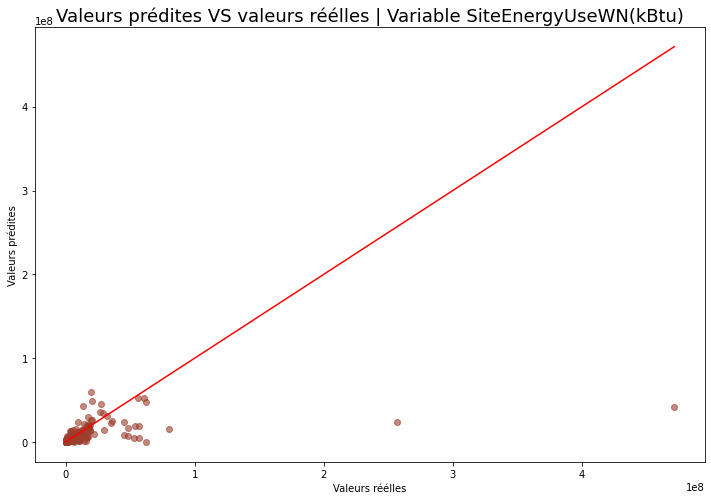

In [92]:
#Affichage des valeurs prédites vs valeurs réélles pour émissions de CO2
plot_pred_test2(y2_test,SEUWN_pred, color="#9C3E2D", title="SiteEnergyUseWN(kBtu)")

In [93]:
SEUWN_test_results = SEUWN_rfr_results[['split0_test_neg_mean_squared_error',
                'split1_test_neg_mean_squared_error',
                'split2_test_neg_mean_squared_error',
                'split3_test_neg_mean_squared_error',
                'split4_test_neg_mean_squared_error',
                ]][SEUWN_rfr_results['rank_test_neg_mean_squared_error']==1].values
SEUWN_train_results = SEUWN_rfr_results[['split0_train_neg_mean_squared_error',
                'split1_train_neg_mean_squared_error',
                'split2_train_neg_mean_squared_error',
                'split3_train_neg_mean_squared_error',
                'split4_train_neg_mean_squared_error',
                ]][SEUWN_rfr_results['rank_test_neg_mean_squared_error']==1].values

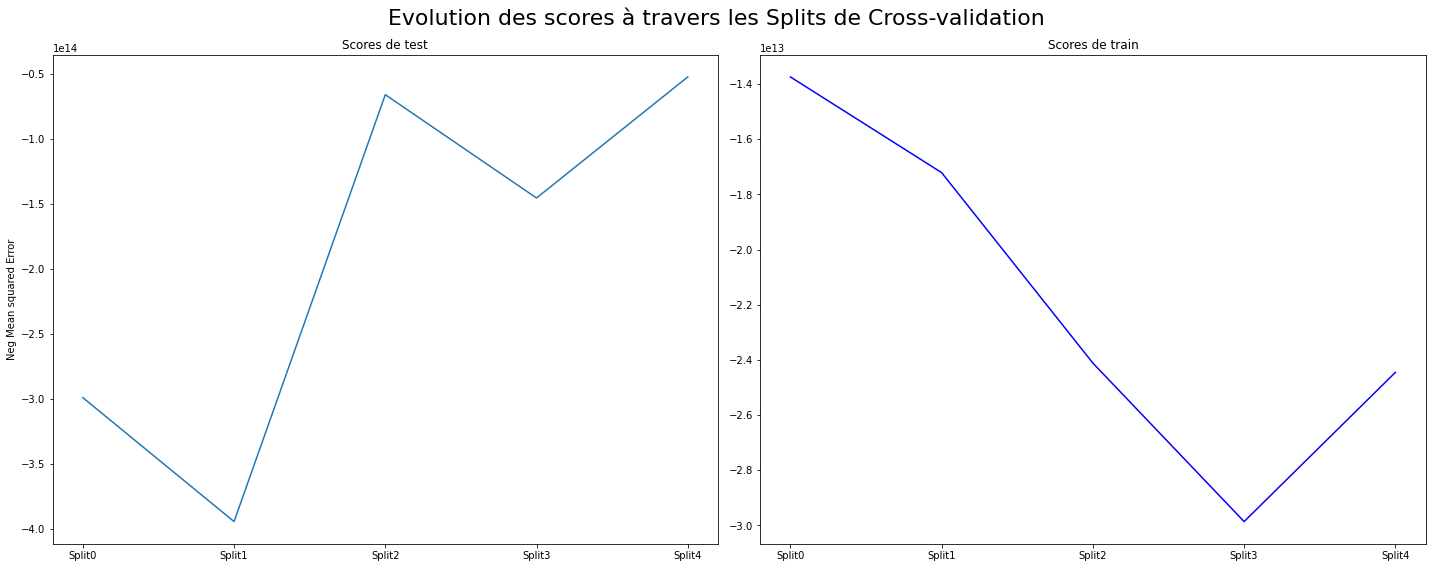

In [94]:
x = np.arange(0,5,1)
fig, ax = plt.subplots(1,2, figsize=(20,8), sharey=False, sharex=False)
ax[0].plot(range(0,5), SEUWN_test_results.reshape(-1))
ax[0].set_xticks(x)
ax[0].set_xticklabels(["Split"+str(n) for n in range(0,5)])
ax[0].set_ylabel('Neg Mean squared Error')
ax[0].set_title('Scores de test')

ax[1].plot(range(0,5), SEUWN_train_results.reshape(-1), color='b')
ax[1].set_xticks(x)
ax[1].set_xticklabels(["Split"+str(n) for n in range(0,5)])
ax[1].set_title('Scores de train')

plt.suptitle("Evolution des scores à travers les Splits de Cross-validation", fontsize=22)
fig.tight_layout()

plt.show()

In [95]:
final_SEUWN_test = pd.concat([X_test,y2_test],axis=1)
final_SEUWN_test

,BuildingType,PrimaryPropertyType,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseTypeGFA,SiteEnergyUseWN(kBtu)
1365,NonResidential,Other,NORTHEAST,1946.0,1.0,1.0,20332.0,0.0,20332.0,20332.0,5.999483e+05
177,Nonresidential COS,Small- and Mid-Sized Office,NORTHWEST,1957.0,1.0,2.0,88073.5,0.0,88073.5,57968.0,1.001611e+07
1411,NonResidential,Worship Facility,BALLARD,1956.0,1.0,2.0,21562.0,0.0,21562.0,21052.0,1.017726e+06
849,NonResidential,Retail Store,DOWNTOWN,1919.0,1.0,2.0,25920.0,0.0,25920.0,38880.0,1.068761e+06
395,NonResidential,Large Office,LAKE UNION,1999.0,1.0,4.0,243334.0,103032.0,140302.0,138995.0,9.490269e+06
...,...,...,...,...,...,...,...,...,...,...,...
1321,NonResidential,Small- and Mid-Sized Office,CENTRAL,1971.0,1.0,2.0,39953.0,0.0,39953.0,30100.0,1.665069e+06
1658,NonResidential,Residence Hall,NORTHEAST,2011.0,1.0,0.0,176225.0,0.0,176225.0,176225.0,5.209464e+06
1340,NonResidential,Worship Facility,NORTHWEST,1951.0,1.0,2.0,21936.0,0.0,21936.0,21936.0,6.787773e+05
652,NonResidential,Warehouse,SOUTHWEST,1965.0,1.0,1.0,152365.0,0.0,152365.0,149293.0,1.182483e+06


In [96]:
final_SEUWN_test = pd.concat([X_test,y2_test],axis=1)
final_SEUWN_test['SEUWN_pred'] = SEUWN_pred
compare_final_SEUWN_test = final_SEUWN_test = final_SEUWN_test.groupby(by='BuildingType').mean()

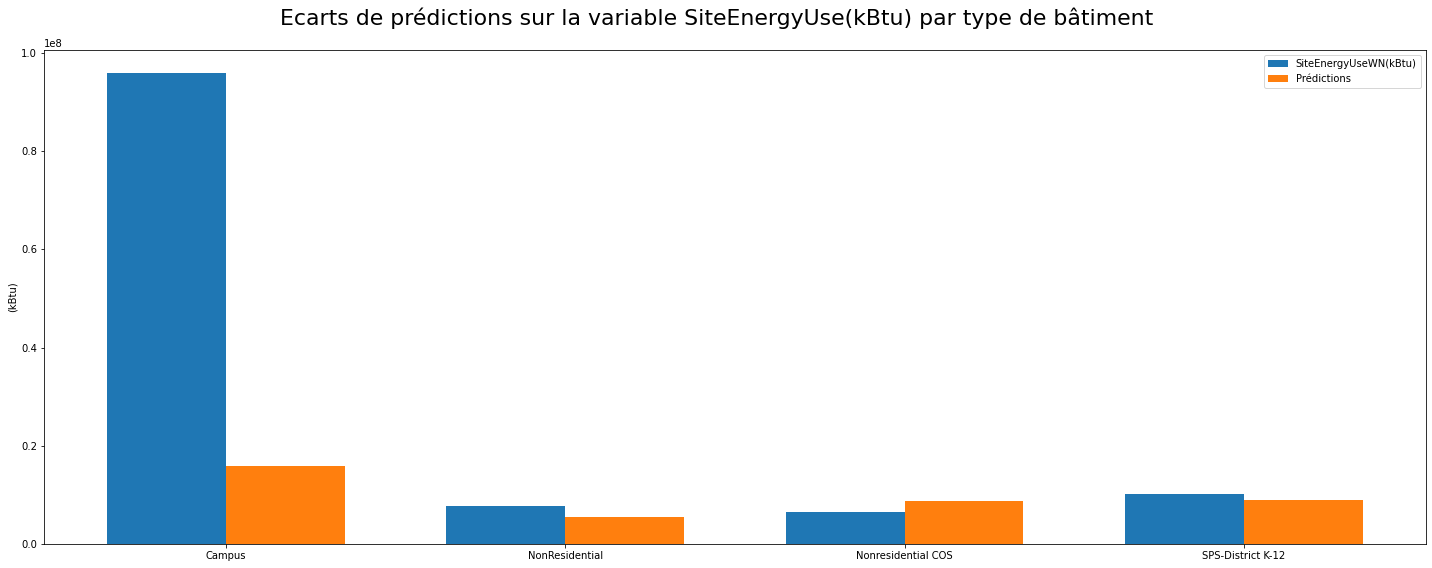

In [97]:
x = np.arange(len(compare_final_SEUWN_test.index))
width = 0.35

fig, ax = plt.subplots(figsize=(20,8), sharey=False, sharex=False)

scores1 = ax.bar(x - width/2, compare_final_SEUWN_test['SiteEnergyUseWN(kBtu)'], width, label='SiteEnergyUseWN(kBtu)')
scores2 = ax.bar(x + width/2, compare_final_SEUWN_test['SEUWN_pred'], width, label='Prédictions')
ax.set_ylabel('(kBtu)')
ax.set_xticks(x)
ax.set_xticklabels(compare_final_SEUWN_test.index)
ax.legend()


plt.suptitle("Ecarts de prédictions sur la variable SiteEnergyUse(kBtu) par type de bâtiment",  fontsize=22)
fig.tight_layout()

plt.show()


##  Influence du score ENERGY STAR Sur la variable TotalGHGEmissions

In [98]:
#Ajout de la variable à nos variables X
X['Energystar_Score'] = Energystar_Score
#Ajout de la variable dans les variables numérique du preprocessor
numeric_features.append('Energystar_Score')

In [99]:
#Filtrage des données ayant un Energy Star Score renseigné
X = X[X['Energystar_Score'].isnull()==False]
y1 = y1[y1.index.isin(list(X.index))]
y2 = y2[y2.index.isin(list(X.index))]

In [100]:
X.shape

(1697, 11)

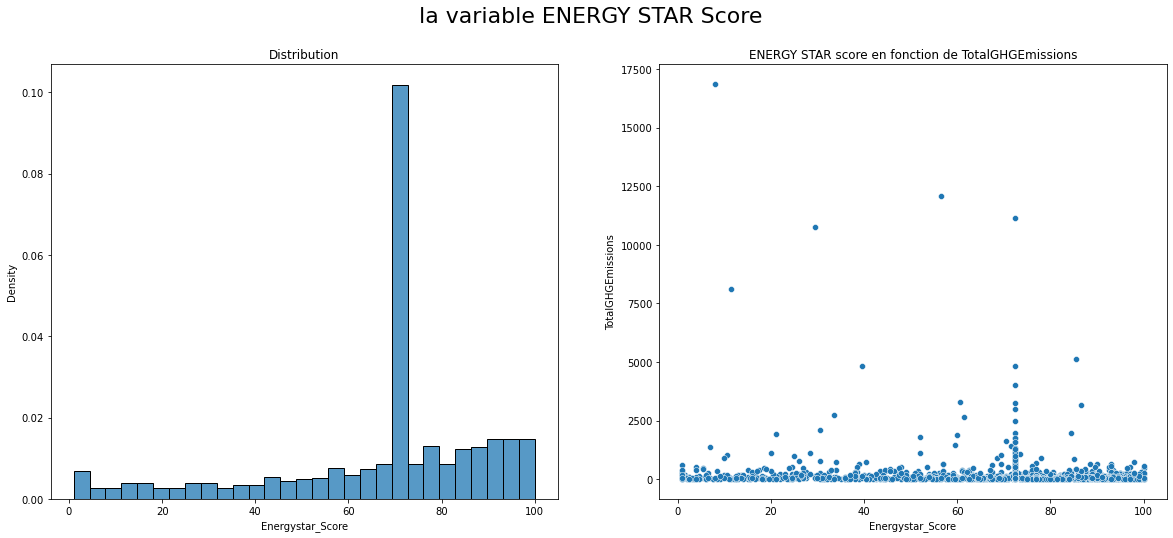

In [101]:
fig, axes = plt.subplots(nrows=1, ncols=2, sharex=False, sharey=False, figsize=(20,8))
sns.histplot(data=X, x='Energystar_Score', stat="density", ax=axes[0])
axes[0].set_title("Distribution")
sns.scatterplot(data=pd.concat([X,y1], axis=1), y='TotalGHGEmissions', x='Energystar_Score', ax=axes[1])
axes[1].set_title("ENERGY STAR score en fonction de TotalGHGEmissions")
plt.suptitle("la variable ENERGY STAR Score", fontsize=22)
plt.show()

In [102]:
X_train, X_test, y1_train, y1_test = train_test_split(X, y1, test_size=0.2, random_state=42)

print("Entrainement: {} lignes,\nTest: {} lignes.\n".format(X_train.shape[0],
                                                            X_test.shape[0]))

Entrainement: 1357 lignes,
Test: 340 lignes.



In [103]:
X_train, X_test, y2_train, y2_test = train_test_split(X, y2, test_size=0.2, random_state=42)

print("Entrainement: {} lignes,\nTest: {} lignes.\n".format(X_train.shape[0],
                                                            X_test.shape[0]))

Entrainement: 1357 lignes,
Test: 340 lignes.



In [104]:
rfr_grid_cv_eStar = Pipeline([
    ('preprocessor', preprocessor),
    ('grid_search_rfr_eStar', GridSearchCV(
                            TransformedTargetRegressor(
                                regressor=RandomForestRegressor(), 
                                func=np.log, 
                                inverse_func=np.exp),
                            param_grid=param_rfr,
                            cv=5,
                            scoring=('r2','neg_mean_squared_error'),
                            refit='neg_mean_squared_error',
                            n_jobs = -1))])


In [105]:
GHG_rfr_model_eStar = rfr_grid_cv_eStar.fit(X_train, y1_train)
GHG_rfr_results_eStar = model_scores(GHG_rfr_model_eStar, 'grid_search_rfr_eStar')

C:\Users\Admin\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


Meilleur score RMSE : 601.965
Meilleur Score R2 : 0.469
Meilleurs paramètres : {'regressor__bootstrap': False, 'regressor__max_depth': 15, 'regressor__max_features': 'sqrt', 'regressor__min_samples_leaf': 1, 'regressor__min_samples_split': 2}
Temps moyen d'entrainement : 360.56s


In [106]:
GHG_pred_star = GHG_rfr_model_eStar.predict(X_test)
#Calcul la métrique RMSE pour les émissions de CO2
GHGmetricsES = metrics_model1(y1_test, GHG_pred_star)
GHGmetrics = GHGmetrics.rename(columns={"Résultats" : "Sans ENERGY STAR"})
GHGmetrics['Avec ENERGY STAR'] = GHGmetricsES['Résultats']
GHGmetrics

,Métrique,Sans ENERGY STAR,Avec ENERGY STAR
0,MSE,1.145747e+14,42585.302155


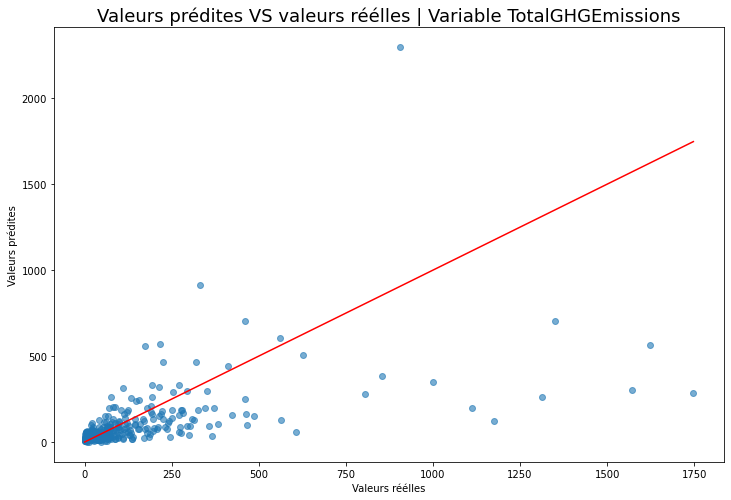

In [107]:
#Affichage des valeurs prédites vs valeurs réélles pour émissions de CO2
plot_pred_test1(y1_test, GHG_pred_star, title="TotalGHGEmissions")